In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 120
import passenger

In [2]:
igh = {"locus": "IGH"}
igk = {"locus": "IGK"}

In [3]:
igh["passenger"] = passenger.CHIGY_HC
igk["passenger"] = passenger.CHIGY_LC

In [4]:
igh["df"] = pd.read_csv("output/chigy_hc_mutation_rates_nt_extras.csv", index_col=0)
igk["df"] = pd.read_csv("output/chigy_lc_mutation_rates_nt_extras.csv", index_col=0)

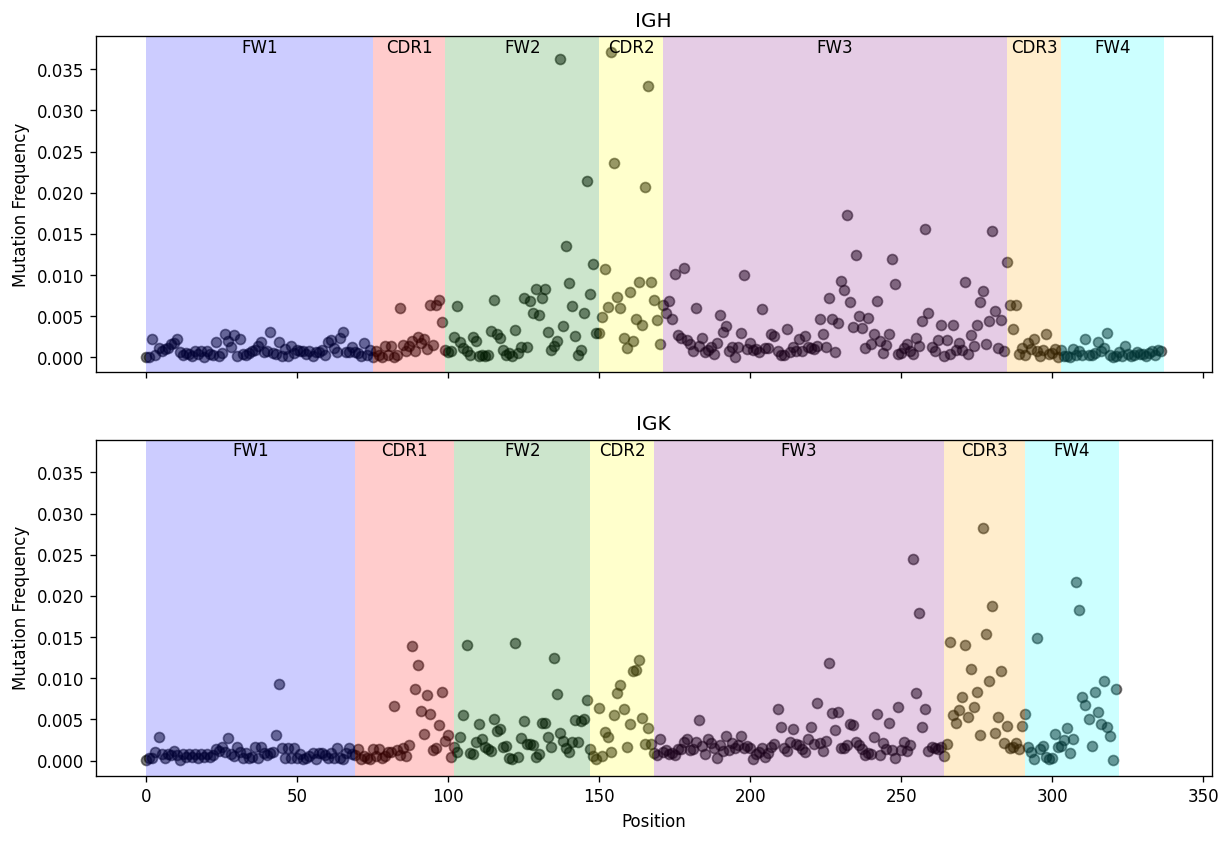

In [5]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True, sharey=True)
igh["ax"] = axs[0]
igk["ax"] = axs[1]

for idx, chain in enumerate([igh, igk]):
    passenger_obj = chain["passenger"]
    passenger_obj.plot_mutation_rates(chain["df"]["rate"], ax=chain["ax"])
    chain["ax"].set_title(chain["locus"])
    if idx == 0:
        chain["ax"].set_xlabel("")

fig.savefig("output/mutability_strip_plot.svg")

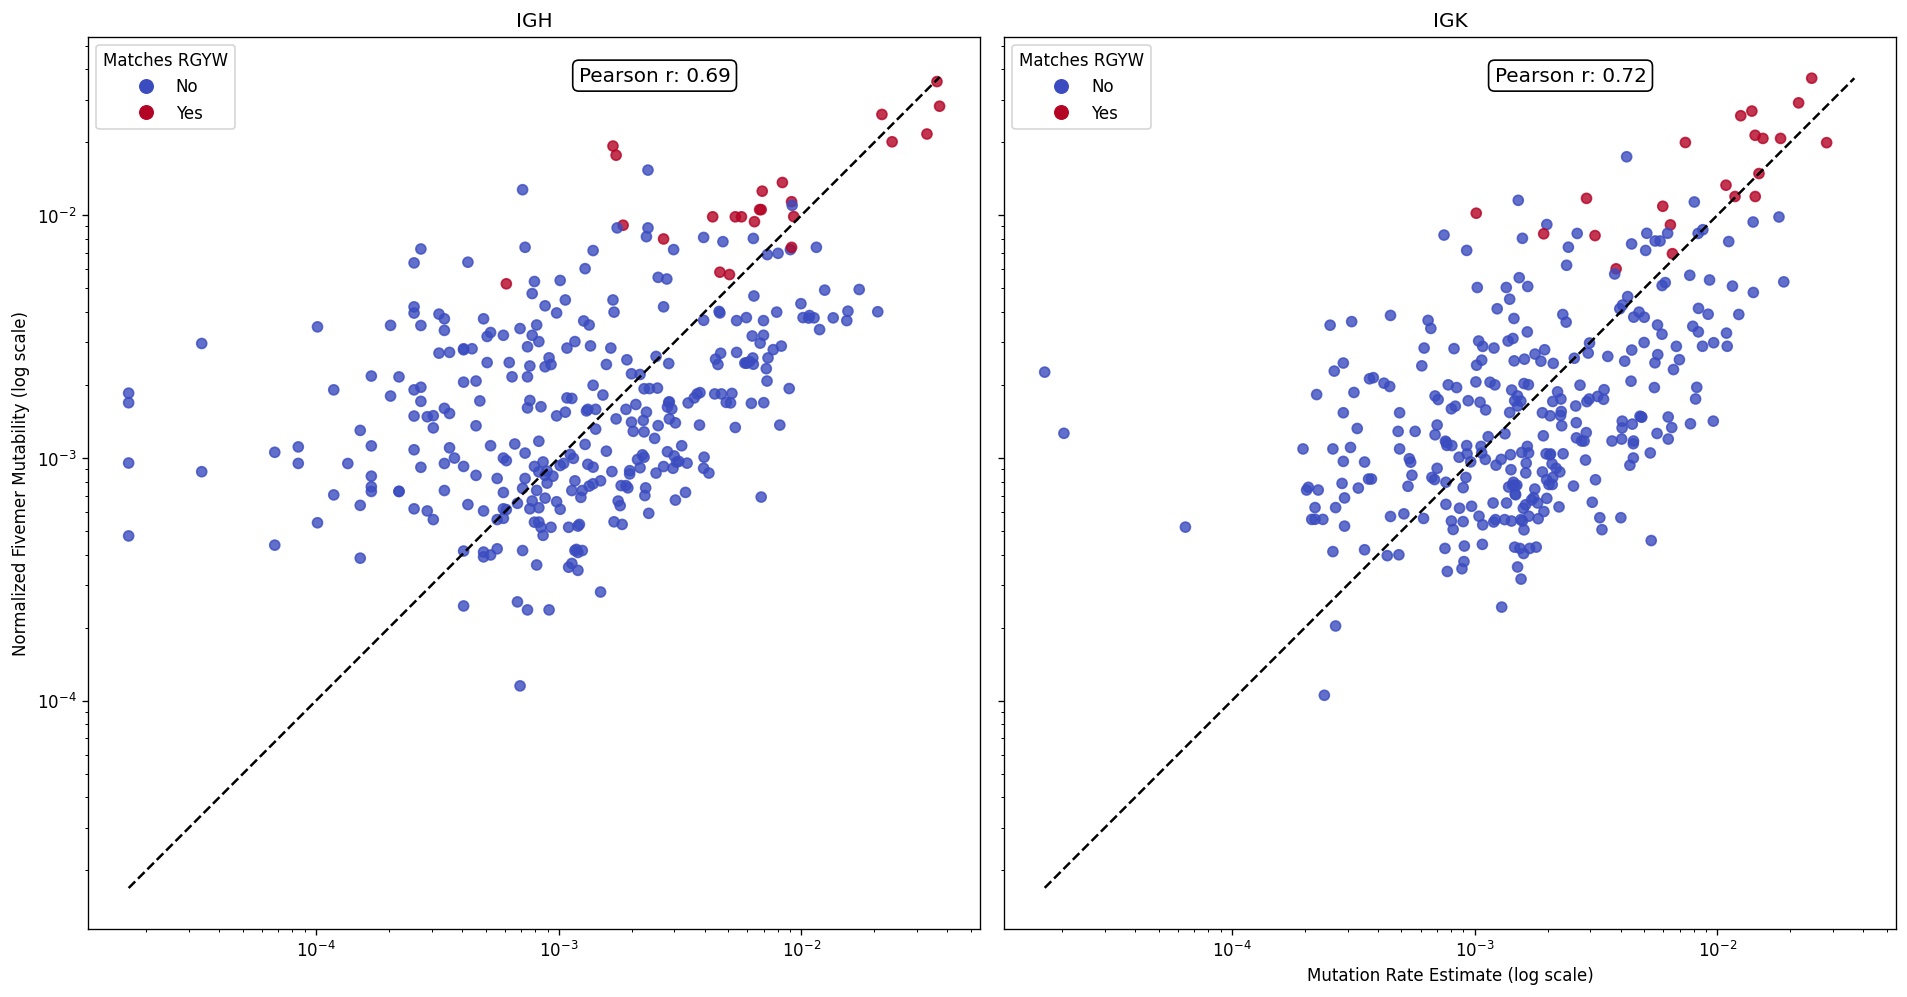

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
igh["ax"] = axs[0]
igk["ax"] = axs[1]

for idx, chain in enumerate([igh, igk]):
    passenger_obj = chain["passenger"]
    df = chain["df"]
    df['matches_RGYW'] = df['Fivemer'].apply(passenger.matches_RGYW)
    passenger.plot_mutation_rate_vs_normed_s5f(df, ax=chain["ax"])
    chain["ax"].set_title(chain["locus"])
    if idx == 0:
        chain["ax"].set_xlabel("")
    else:
        chain["ax"].set_ylabel("")

for ax in axs:
    ax.set_aspect('equal', adjustable='box')

# Use tight_layout or constrained_layout to adjust spacing
plt.tight_layout()

fig.savefig("output/mutability_vs_fivemer.svg")
